In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os, subprocess

from coolpuppy import coolpup
from coolpuppy.lib import numutils
from coolpuppy.lib.puputils import divide_pups
from coolpuppy import plotpup
import cooler
import bioframe
import cooltools
from cooltools import expected_cis, expected_trans
from cooltools.lib import plotting

In [2]:
resolution = 100
flank=1000
mindist=90

In [3]:
# clr_1 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/R3D7/regular_file/DMSO4h/DNaseC_R3D7_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_2 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/R3D7/regular_file/dTAG4h/DNaseC_R3D7_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_3 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/C2D5/regular_file/DMSO4h/DNaseC_C2D5_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_4 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/C2D5/regular_file/dTAG4h/DNaseC_C2D5_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_5 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/RC1A3/regular_file/DMSO4h/DNaseC_RC1A3_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_6 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/RC1A3/regular_file/dTAG4h/DNaseC_RC1A3_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')

# clr_0 = cooler.Cooler(f'../DNaseC_293T_total_UMI_wlink_nochrCLMT.mcool::/resolutions/{resolution}')
# clr_1 = cooler.Cooler(f'../DNaseC_R3D7_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_2 = cooler.Cooler(f'../DNaseC_R3D7_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_3 = cooler.Cooler(f'../DNaseC_C2D5_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_4 = cooler.Cooler(f'../DNaseC_C2D5_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_5 = cooler.Cooler(f'../DNaseC_RC1A3_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_6 = cooler.Cooler(f'../DNaseC_RC1A3_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')

# clr_0 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/293T/regular_file/DNaseC_293T_total_UMI_wlink_nochrCLMT.mcool::/resolutions/{resolution}')
# clr_0 = cooler.Cooler(f'/mnt/disk1/6/lxk/private/DNase-C/dimer_paper/fig2/2D/R3/C-C/C-C_50bp.mcool::/resolutions/{resolution}')
clr_1 = cooler.Cooler(f'DNaseC_R3D7_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
clr_2 = cooler.Cooler(f'DNaseC_R3D7_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_3 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/C2D5/regular_file/DMSO4h/DNaseC_C2D5_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
# clr_4 = cooler.Cooler(f'/mnt/disk5/1/DNaseC/total/C2D5/regular_file/dTAG4h/DNaseC_C2D5_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')
clr_5 = cooler.Cooler(f'DNaseC_RC1A3_DMSO4h_UMI_rmdup.mcool::/resolutions/{resolution}')
clr_6 = cooler.Cooler(f'DNaseC_RC1A3_dTAG4h_UMI_rmdup.mcool::/resolutions/{resolution}')

In [4]:
hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
hg38_cens = bioframe.fetch_centromeres('hg38')
hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)

hg38_arms = hg38_arms.set_index("chrom").loc[clr_1.chromnames].reset_index()

hg38_arms = bioframe.make_viewframe(hg38_arms)

In [5]:
sites = bioframe.read_table('DNaseC_293T_loop_groupby_0.1_10kb.txt', schema='bedpe')

# sites = bioframe.read_table('DNaseC_293T_loop_groupby_50_5000kb.txt', schema='bedpe')

# sites = bioframe.read_table('/mnt/disk5/1/DNaseC/total/R3D7/regular_file/dTAG4h/DNaseC_R3D7_dTAG4h_UMI_rmdup_noheader.bedpe', schema='bedpe')

# sites = bioframe.read_table('/mnt/disk5/1/DNaseC/total/R3D7/regular_file/DMSO4h/DNaseC_R3D7_DMSO4h_UMI_rmdup_noheader.bedpe', schema='bedpe')

#sites = ctcf.sort_values('score', ascending=False).head(1000)

sites = sites[sites['score'] > 2]

In [6]:
sites

,chrom1,start1,end1,chrom2,start2,end2,name,score,strand1,strand2
4,chr17,73650353,73650354,chr17,73657679,73657680,61,4,+,+
5,chr17,73710346,73710347,chr17,73710515,73710516,87,9,-,+
8,chr17,74085645,74085646,chr17,74090067,74090068,143,3,-,+
9,chr17,74086879,74086880,chr17,74090067,74090068,147,4,+,+
12,chr17,74199796,74199797,chr17,74203557,74203558,168,17,-,+
...,...,...,...,...,...,...,...,...,...,...
27028,chr17,72725659,72725660,chr17,72727866,72727867,291372,16,+,+
27030,chr17,72986075,72986076,chr17,72986295,72986296,291406,3,-,+
27031,chr17,72986295,72986296,chr17,72986565,72986566,291413,4,+,+
27032,chr17,73013617,73013618,chr17,73013983,73013984,291424,5,+,-


In [7]:
# expected_0 = expected_cis(
#     clr_0,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000, 
#     nproc=80,
# #     clr_weight_name=None,
# #     smooth=False
# )

In [8]:
# pup_0 = coolpup.pileup(
#     clr_0,
#     sites,
#     features_format='bedpe',
#     view_df=hg38_arms,
# #     local=True,
# #     flip_negative_strand=True,
#     expected_df=expected_0,
#     expected_value_col='count.avg',
#     nshifts=10,
#     flank=flank,
#     mindist=mindist,
# #     maxdist=600_000,
# #     subset=2000,
# #     seed=1,
#     min_diag=2,
#     nproc=80,
#     clr_weight_name=False,
#     coverage_norm=True
# )

In [9]:
# fig_0 = plotpup.plot(
#     pup_0,
#     score=True,
#     cmap='coolwarm',
#     scale='log',
#     sym=True,
# #     vmax=1.2,
# #     vmin=0.83333,
#     height=2,
#     plot_ticks=True
# )

# # fig_0.savefig('293T_WT.pdf')

In [10]:
# expected_1 = expected_cis(
#     clr_1,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000, 
#     nproc=80,
# #     clr_weight_name=None,
# #     smooth=False
# )

In [11]:
pup_1 = coolpup.pileup(
    clr_1,
    sites,
    features_format='bedpe',
    view_df=hg38_arms,
#     local=True,
#     flip_negative_strand=True,
#     expected_df=expected_1,
#     expected_value_col='count.avg',
    nshifts=10,
    flank=flank,
    mindist=mindist,
#     maxdist=600_000,
#     subset=2000,
#     seed=1,
    min_diag=2,
    nproc=80,
    clr_weight_name=False,
#     coverage_norm=True
)

INFO:coolpuppy:('chr18_p', 'chr18_p'): 19
INFO:coolpuppy:('chr19_p', 'chr19_p'): 208
INFO:coolpuppy:('chr17_p', 'chr17_p'): 92
INFO:coolpuppy:('chr21_q', 'chr21_q'): 62
INFO:coolpuppy:('chr16_p', 'chr16_p'): 141
INFO:coolpuppy:('chr22_q', 'chr22_q'): 218
INFO:coolpuppy:('chr9_p', 'chr9_p'): 86
INFO:coolpuppy:('chr20_q', 'chr20_q'): 172
INFO:coolpuppy:('chr8_p', 'chr8_p'): 112
INFO:coolpuppy:('chr20_p', 'chr20_p'): 59
INFO:coolpuppy:('chr5_p', 'chr5_p'): 47
INFO:coolpuppy:('chr4_p', 'chr4_p'): 79
INFO:coolpuppy:('chr12_p', 'chr12_p'): 96
INFO:coolpuppy:('chrX_p', 'chrX_p'): 101
INFO:coolpuppy:('chr7_p', 'chr7_p'): 144
INFO:coolpuppy:('chr19_q', 'chr19_q'): 233
INFO:coolpuppy:('chr16_q', 'chr16_q'): 144
INFO:coolpuppy:('chr10_p', 'chr10_p'): 79
INFO:coolpuppy:('chr6_p', 'chr6_p'): 214
INFO:coolpuppy:('chr11_p', 'chr11_p'): 160
INFO:coolpuppy:('chr18_q', 'chr18_q'): 110
INFO:coolpuppy:('chr17_q', 'chr17_q'): 364
INFO:coolpuppy:('chr9_q', 'chr9_q'): 264
INFO:coolpuppy:('chr14_q', 'chr14_q'

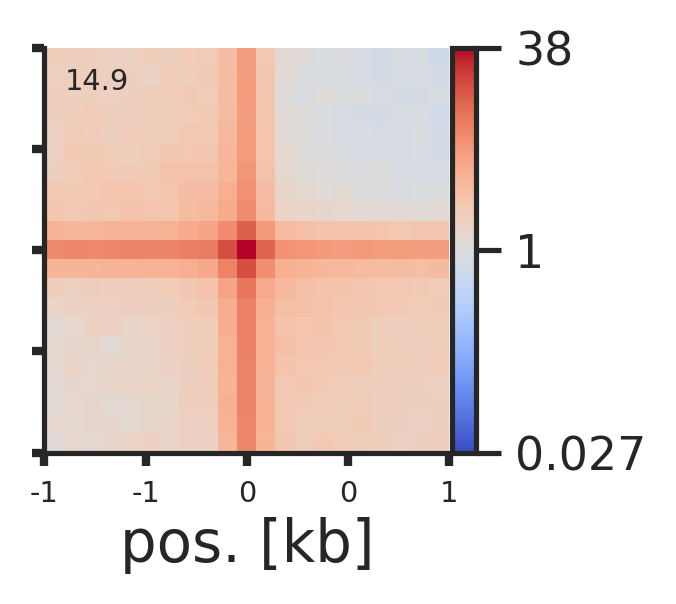

In [12]:
fig_1 = plotpup.plot(
    pup_1,
    score=True,
    cmap='coolwarm',
#     scale='linear',
    sym=True,
#     vmax=1.5,
#     vmin=0.6667,
    height=2,
    plot_ticks=True
)

# fig_1.savefig('R3D7_DMSO.pdf')

In [13]:
# expected_2 = expected_cis(
#     clr_2,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000,
#     nproc=80,
#     clr_weight_name=None
# )

In [14]:
pup_2 = coolpup.pileup(
    clr_2,
    sites,
    features_format='bedpe',
    view_df=hg38_arms,
#     local=True,
#     flip_negative_strand=True,
#     expected_df=expected_2,
#     expected_value_col='count.avg',
    nshifts=10,
    flank=flank,
    mindist=mindist,
#     maxdist=600_000,
#     subset=2000,
#     seed=1,
    min_diag=2,
    nproc=80,
    clr_weight_name=False,
#     coverage_norm=True
)

INFO:coolpuppy:('chr18_p', 'chr18_p'): 19
INFO:coolpuppy:('chr20_p', 'chr20_p'): 59
INFO:coolpuppy:('chr17_p', 'chr17_p'): 92
INFO:coolpuppy:('chr19_p', 'chr19_p'): 208
INFO:coolpuppy:('chr12_p', 'chr12_p'): 96
INFO:coolpuppy:('chr22_q', 'chr22_q'): 218
INFO:coolpuppy:('chr10_p', 'chr10_p'): 79
INFO:coolpuppy:('chr9_p', 'chr9_p'): 86
INFO:coolpuppy:('chr4_p', 'chr4_p'): 79
INFO:coolpuppy:('chr19_q', 'chr19_q'): 233
INFO:coolpuppy:('chr5_p', 'chr5_p'): 47
INFO:coolpuppy:('chr7_p', 'chr7_p'): 144
INFO:coolpuppy:('chr8_p', 'chr8_p'): 112
INFO:coolpuppy:('chr16_p', 'chr16_p'): 141
INFO:coolpuppy:('chr21_q', 'chr21_q'): 62
INFO:coolpuppy:('chrX_p', 'chrX_p'): 101
INFO:coolpuppy:('chr20_q', 'chr20_q'): 172
INFO:coolpuppy:('chr11_p', 'chr11_p'): 160
INFO:coolpuppy:('chr18_q', 'chr18_q'): 110
INFO:coolpuppy:('chr17_q', 'chr17_q'): 364
INFO:coolpuppy:('chr16_q', 'chr16_q'): 144
INFO:coolpuppy:('chr6_p', 'chr6_p'): 214
INFO:coolpuppy:('chr9_q', 'chr9_q'): 264
INFO:coolpuppy:('chr11_q', 'chr11_q'

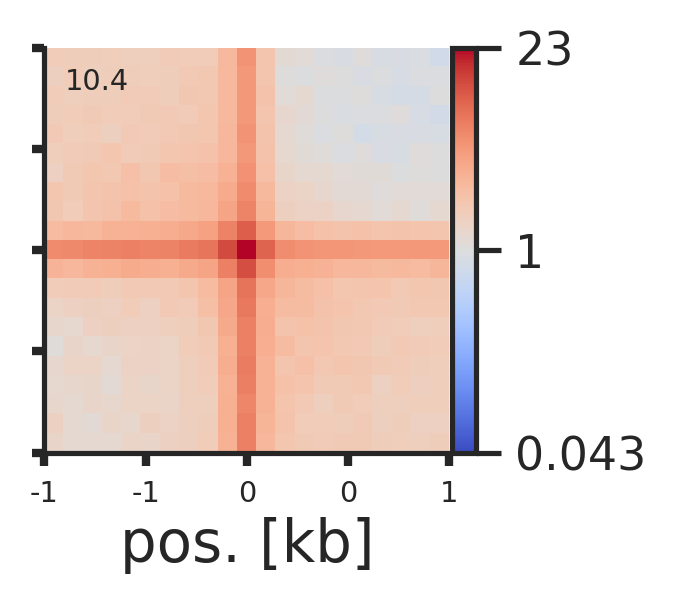

In [15]:
fig_2 = plotpup.plot(
    pup_2,
    score=True,
    cmap='coolwarm',
    scale='log',
    sym=True,
#     vmax=6.3,
#     vmin=0.159,
    height=2,
    plot_ticks=True
)

# fig_2.savefig('R3D7_dTAG.pdf')

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


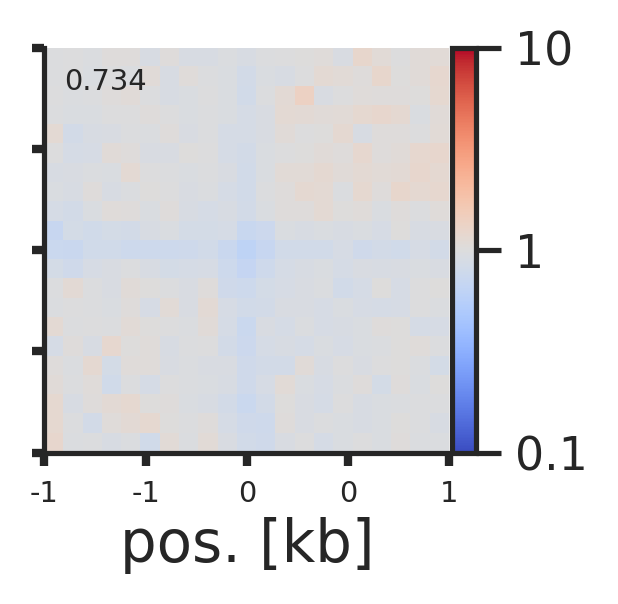

In [38]:
pup_divide_1 = divide_pups(pup_2, pup_1)

fig_divide_1 = plotpup.plot(
    pup_divide_1,
    score=True,
    cmap='coolwarm',
    scale='log',
    sym=True,
    vmax=10,
    vmin=0.1,
    height=2,
    plot_ticks=True
)

fig_divide_1.savefig('R3D7_dTAG-DMSO_0.1_10kb.pdf')

In [17]:
# expected_3= expected_cis(
#     clr_3,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000,
#     nproc=80
# )

In [18]:
# pup_3 = coolpup.pileup(
#     clr_3,
#     sites,
#     features_format='bedpe',
#     view_df=hg38_arms,
# #     local=True,
# #     flip_negative_strand=True,
#     expected_df=expected_3,
# #     nshifts=10,
#     flank=flank,
#     mindist=mindist,
# #     maxdist=600_000,
# #     subset=2000,
# #     seed=1,
#     min_diag=2,
#     nproc=80
# )

In [19]:
# fig_3 = plotpup.plot(
#     pup_3,
#     score=True,
#     cmap='coolwarm',
#     scale='log',
#     sym=True,
#     vmax=6.3,
#     vmin=0.159,
#     height=2,
#     plot_ticks=True
# )

# # fig_3.savefig('C2D5_DMSO.pdf')

In [20]:
# expected_4 = expected_cis(
#     clr_4,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000,
#     nproc=80
# )

In [21]:
# pup_4 = coolpup.pileup(
#     clr_4,
#     sites,
#     features_format='bedpe',
#     view_df=hg38_arms,
# #     local=True,
# #     flip_negative_strand=True,
#     expected_df=expected_4,
# #     nshifts=10,
#     flank=flank,
#     mindist=mindist,
# #     maxdist=600_000,
# #     subset=2000,
# #     seed=1,
#     min_diag=2,
#     nproc=80
# )

In [22]:
# fig_4 = plotpup.plot(
#     pup_4,
#     score=True,
#     cmap='coolwarm',
#     scale='log',
#     sym=True,
#     vmax=6.3,
#     vmin=0.159,
#     height=2,
#     plot_ticks=True
# )

# # fig_4.savefig('C2D5_dTAG.pdf')

In [23]:
# pup_divide_2 = divide_pups(pup_4, pup_3)

# fig_divide_2 = plotpup.plot(
#     pup_divide_2,             
#     score=True,
#     cmap='coolwarm',
#     scale='log',
#     sym=True,
#     vmax=3.3,
#     vmin=0.3,
#     height=2,
#     plot_ticks=True
# )

# # fig_divide_2.savefig('C2D5_dTAG-DMSO.pdf')

In [24]:
# expected_5 = expected_cis(
#     clr_5,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000, 
#     nproc=80,
#     clr_weight_name=None
# )

In [25]:
pup_5 = coolpup.pileup(
    clr_5,
    sites,
    features_format='bedpe',
    view_df=hg38_arms,
#     local=True,
#     flip_negative_strand=True,
#     expected_df=expected_5,
#     expected_value_col='count.avg',
    nshifts=10,
    flank=flank,
    mindist=mindist,
#     maxdist=600_000,
#     subset=2000,
#     seed=1,
    min_diag=2,
    nproc=80,
    clr_weight_name=False,
#     coverage_norm=True
)

INFO:coolpuppy:('chr18_p', 'chr18_p'): 19
INFO:coolpuppy:('chr20_p', 'chr20_p'): 59
INFO:coolpuppy:('chr19_p', 'chr19_p'): 208
INFO:coolpuppy:('chr22_q', 'chr22_q'): 218
INFO:coolpuppy:('chr8_p', 'chr8_p'): 112
INFO:coolpuppy:('chr19_q', 'chr19_q'): 233
INFO:coolpuppy:('chr21_q', 'chr21_q'): 62
INFO:coolpuppy:('chr10_p', 'chr10_p'): 79
INFO:coolpuppy:('chr17_p', 'chr17_p'): 92
INFO:coolpuppy:('chr16_q', 'chr16_q'): 144
INFO:coolpuppy:('chr4_p', 'chr4_p'): 79
INFO:coolpuppy:('chr5_p', 'chr5_p'): 47
INFO:coolpuppy:('chr6_p', 'chr6_p'): 214
INFO:coolpuppy:('chr12_p', 'chr12_p'): 96
INFO:coolpuppy:('chr16_p', 'chr16_p'): 141
INFO:coolpuppy:('chr20_q', 'chr20_q'): 172
INFO:coolpuppy:('chr9_p', 'chr9_p'): 86
INFO:coolpuppy:('chr11_p', 'chr11_p'): 160
INFO:coolpuppy:('chr18_q', 'chr18_q'): 110
INFO:coolpuppy:('chr7_p', 'chr7_p'): 144
INFO:coolpuppy:('chr9_q', 'chr9_q'): 264
INFO:coolpuppy:('chrX_p', 'chrX_p'): 101
INFO:coolpuppy:('chrX_q', 'chrX_q'): 162
INFO:coolpuppy:('chr17_q', 'chr17_q'):

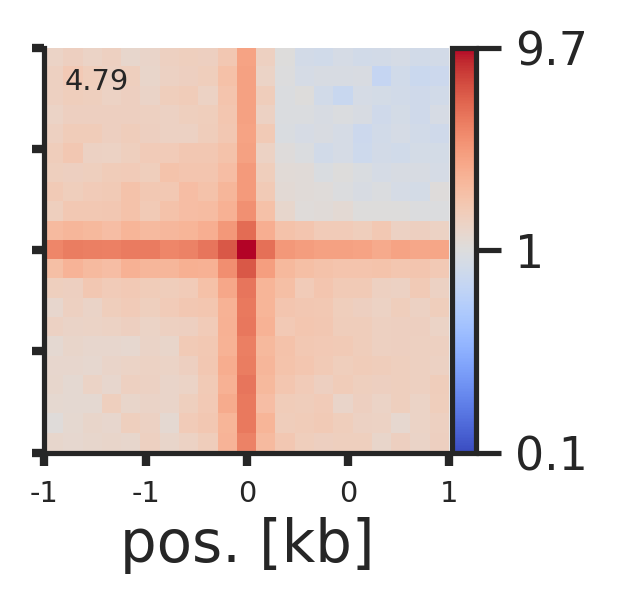

In [26]:
fig_5 = plotpup.plot(
    pup_5,
    score=True,
    cmap='coolwarm',
    scale='log',
    sym=True,
#     vmax=6.3,
#     vmin=0.159,
    height=2,
    plot_ticks=True
)

# fig_5.savefig('RC1A3_DMSO.pdf')

In [27]:
# expected_6 = expected_cis(
#     clr_6,
#     ignore_diags=2,
#     view_df=hg38_arms,
#     chunksize=1000000,
#     nproc=80,
# #     clr_weight_name=None
# )

In [28]:
pup_6 = coolpup.pileup(
    clr_6,
    sites,
    features_format='bedpe',
    view_df=hg38_arms,
#     local=True,
#     flip_negative_strand=True,
#     expected_df=expected_6,
#     expected_value_col='count.avg',
    nshifts=10,
    flank=flank,
    mindist=mindist,
#     maxdist=600_000,
#     subset=2000,
#     seed=1,
    min_diag=2,
    nproc=80,
    clr_weight_name=False,
#     coverage_norm=True
)

INFO:coolpuppy:('chr18_p', 'chr18_p'): 19
INFO:coolpuppy:('chr16_p', 'chr16_p'): 141
INFO:coolpuppy:('chr8_p', 'chr8_p'): 112
INFO:coolpuppy:('chr21_q', 'chr21_q'): 62
INFO:coolpuppy:('chr19_q', 'chr19_q'): 233
INFO:coolpuppy:('chr19_p', 'chr19_p'): 208
INFO:coolpuppy:('chr12_p', 'chr12_p'): 96
INFO:coolpuppy:('chr20_p', 'chr20_p'): 59
INFO:coolpuppy:('chr17_p', 'chr17_p'): 92
INFO:coolpuppy:('chr4_p', 'chr4_p'): 79
INFO:coolpuppy:('chr18_q', 'chr18_q'): 110
INFO:coolpuppy:('chr9_p', 'chr9_p'): 86
INFO:coolpuppy:('chr20_q', 'chr20_q'): 172
INFO:coolpuppy:('chr17_q', 'chr17_q'): 364
INFO:coolpuppy:('chr22_q', 'chr22_q'): 218
INFO:coolpuppy:('chr11_p', 'chr11_p'): 160
INFO:coolpuppy:('chr5_p', 'chr5_p'): 47
INFO:coolpuppy:('chr16_q', 'chr16_q'): 144
INFO:coolpuppy:('chr10_p', 'chr10_p'): 79
INFO:coolpuppy:('chrX_p', 'chrX_p'): 101
INFO:coolpuppy:('chr7_p', 'chr7_p'): 144
INFO:coolpuppy:('chr6_p', 'chr6_p'): 214
INFO:coolpuppy:('chrX_q', 'chrX_q'): 162
INFO:coolpuppy:('chr13_q', 'chr13_q'

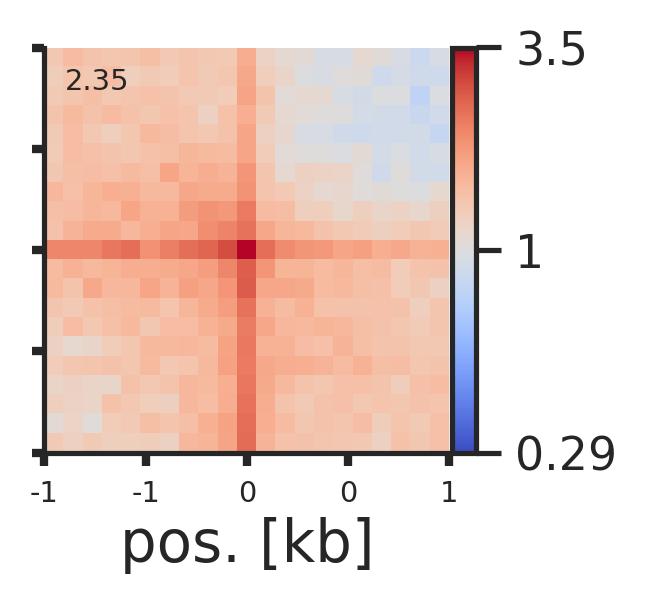

In [29]:
fig_6 = plotpup.plot(
    pup_6,
    score=True,
    cmap='coolwarm',
    scale='log',
    sym=True,
#     vmax=6.3,
#     vmin=0.159,
    height=2,
    plot_ticks=True
)

# fig_6.savefig('RC1A3_dTAG.pdf')

INFO:coolpuppy:Can't set both vmin and vmax and get symmetrical scale. Plotting non-symmetrical


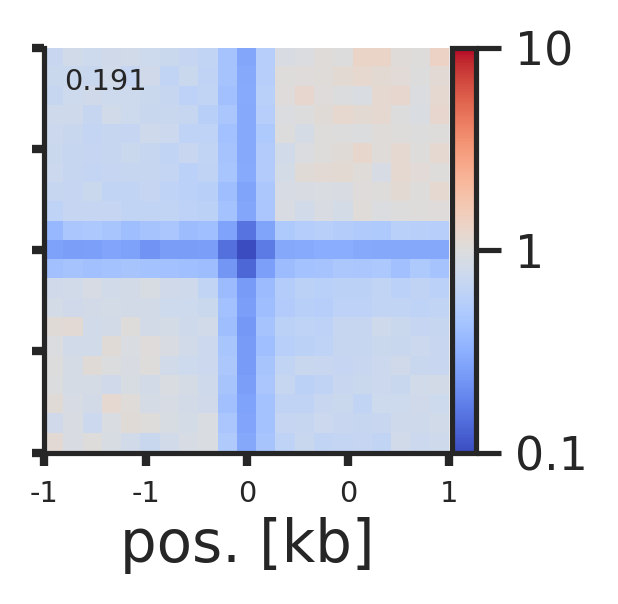

In [37]:
pup_divide_3 = divide_pups(pup_6, pup_1)

fig_divide_3 = plotpup.plot(
    pup_divide_3,
    score=True,
    cmap='coolwarm',
#     scale='linear',
    sym=True,
    vmax=10,
    vmin=0.1,
    height=2,
    plot_ticks=True
)

fig_divide_3.savefig('RC1A3_dTAG-DMSO_0.1_10kb.pdf')